In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import math
from random import random

from IPython.display import display, clear_output

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from PIL import Image

# from bokeh import palettes
# from bokeh.plotting import figure, show, output_file, ColumnDataSource
# from bokeh.tile_providers import STAMEN_TONER_BACKGROUND
# from bokeh.io import output_notebook, reset_output
# from bokeh.models import WMTSTileSource, HoverTool

# reset_output()
# output_notebook()

In [3]:
def virtual_value(x, y, points, alpha):
    dist = np.zeros(len(points))
    for i,p in enumerate(points):
        dist[i] = math.hypot(x-p[0], y-p[1])
    
    nom = sum( [points[i][2] * (1/(dist[i]**alpha)) for i in range(len(points))] )
    denom = sum( [(1/(dist[i]**alpha)) for i in range(len(points))])
    
    return nom/denom     


In [4]:
def transparent_cmap(cmap, N=255):
    "Copy colormap and set alpha values"

    mycmap = cmap
    mycmap._init()
    mycmap._lut[:,-1] = np.linspace(0, 0.8, N+4)
    return mycmap

In [79]:
img = mpimg.imread('figures/15-bus.png')
f = pd.read_excel('figures/15_bus_coord.xlsx', index='bus')
res = pd.read_csv('figures/results_case1_no_uncert.csv')

buses = pd.merge(res, f, how='left', on=['bus'])

In [80]:
img_xdim = 396
img_ydim = 469

raster_x, raster_y = np.mgrid[0:img_xdim, 0:img_ydim]
raster = np.zeros((img_xdim, img_ydim))

known_points_with_value = []
known_points_coords = []
for i, b in buses.iterrows():
    x = int(b.x)
    y = int(b.y)
    val = abs(b['lambda'])
    known_points_with_value.append([x, y, val])
    known_points_coords.append([x, y])
    raster[x][y] = val
    
alpha = 2

for x in range(img_xdim):
    clear_output(wait=True)
    display(">>Raster calculation: {:.1f}%".format(x/img_xdim*100))
    for y in range(img_ydim):
        if [x, y] not in known_points_coords:
            raster[x][y] = virtual_value(x, y, known_points_with_value, alpha)



'>>Raster calculation: 99.7%'

<IPython.core.display.Javascript object>


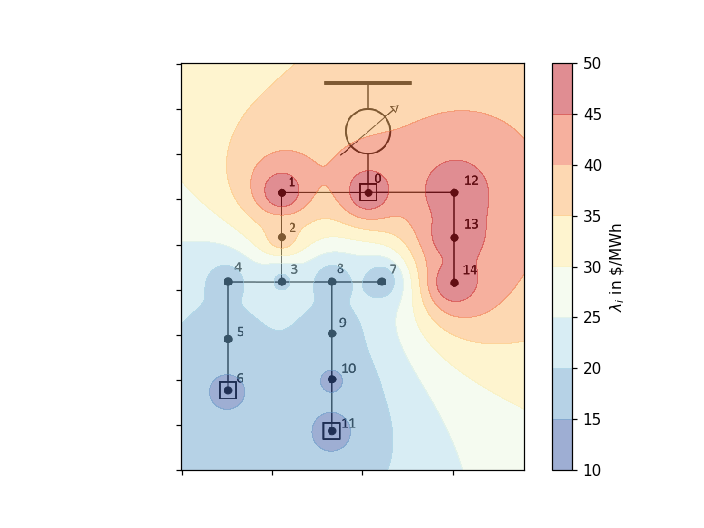

In [81]:
fig, ax = plt.subplots(1, 1)

cf = ax.contourf(raster_x, raster_y, raster, alpha=0.5, cmap=plt.cm.RdYlBu_r)
ax.imshow(img, 'gray', interpolation='none')
cbar = plt.colorbar(cf)
cbar.set_label(r'$\lambda_i$ in \$/MWh')


ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [82]:
plt.savefig('yury/lmps_c1_no_uncert.eps')

In [71]:
raster_c2_uncert = raster

<IPython.core.display.Javascript object>


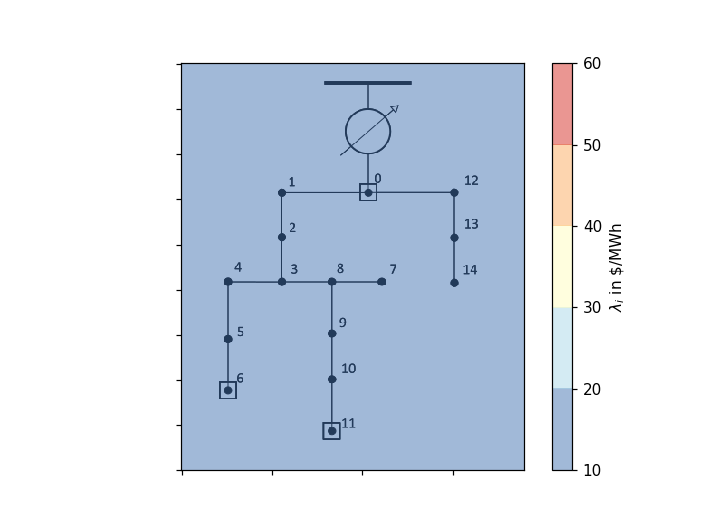

In [77]:
levels = np.linspace(10, 60, 6)
fig, ax = plt.subplots(1, 1)

cf = ax.contourf(raster_x, raster_y, raster_c2_no_uncert, alpha=0.5, cmap=plt.cm.RdYlBu_r, levels = levels)
ax.imshow(img, 'gray', interpolation='none')
cbar = plt.colorbar(cf)
cbar.set_label(r'$\lambda_i$ in \$/MWh')


ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [78]:
plt.savefig('yury/dlmps_c2_no_uncert.eps')

<IPython.core.display.Javascript object>


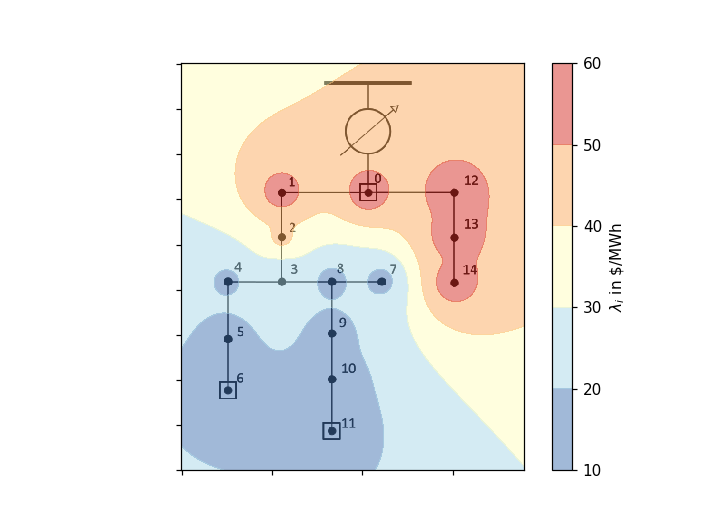

In [75]:
# levels = np.linspace(0, 0.014, 8)
fig, ax = plt.subplots(1, 1)

cf = ax.contourf(raster_x, raster_y, raster_c2_uncert, alpha=0.5, cmap=plt.cm.RdYlBu_r, levels = levels)
ax.imshow(img, 'gray', interpolation='none')
cbar = plt.colorbar(cf)
cbar.set_label(r'$\lambda_i$ in \$/MWh')


ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [76]:
plt.savefig('yury/dlmps_c2_uncert.eps')

In [33]:
res

,objective,bus,gp,gq,voltage,alpha,lambda,pi,gamma,eta,delta_plus,delta_minus,mu_plus,mu_minus,voltvar
0,20.032687,1,-0.145727,0.936462,1.000000,0,-38.326708,0.000000e+00,0.0,0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0
1,0.000000,2,0.000000,0.000000,0.900000,0,-38.630517,-3.645703e+01,0.0,0,0.000000,0.000000e+00,-3.470245e-07,-1.992788e+02,0
2,0.000000,3,0.000000,0.000000,0.967086,0,-30.264179,-2.449970e+01,0.0,0,0.000000,0.000000e+00,-5.179927e-07,-1.140307e-06,0
3,0.000000,4,0.000000,0.000000,1.063758,0,-17.150914,-5.758346e+00,0.0,0,0.000000,0.000000e+00,-2.012951e-06,-4.311353e-07,0
4,0.000000,5,0.000000,0.000000,1.071310,0,-16.244200,-4.462361e+00,0.0,0,0.000000,0.000000e+00,-2.588903e-06,-4.099399e-07,0
5,0.000000,6,0.000000,0.000000,1.078537,0,-15.413441,-3.270816e+00,0.0,0,0.000000,0.000000e+00,-3.563620e-06,-3.913093e-07,0
6,0.000000,7,0.975453,-0.322255,1.100000,0,-13.125294,-6.612641e-07,0.0,0,-0.000014,-5.180678e-08,-2.373597e+01,-3.438077e-07,0
7,0.000000,8,0.000000,0.000000,1.066147,0,-15.226737,-3.006820e+00,0.0,0,0.000000,0.000000e+00,-0.000000e+00,-4.234192e-07,0
8,0.000000,9,0.000000,0.000000,1.075895,0,-15.226737,-3.006820e+00,0.0,0,0.000000,0.000000e+00,-3.317415e-06,-0.000000e+00,0
9,0.000000,10,0.000000,0.000000,1.081000,0,-14.753967,-2.330758e+00,0.0,0,0.000000,0.000000e+00,-4.503029e-06,-0.000000e+00,0
